### Задача - найти самую большую коррелирующую между собой клику акций и построить её граф на примере S&P500

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(url)[0]
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [7]:
names=df[['Symbol','Security']]
symbol=names['Symbol'].values
full_name=names['Security'].values
print(symbol)

['MMM' 'AOS' 'ABT' 'ABBV' 'ACN' 'ATVI' 'ADM' 'ADBE' 'ADP' 'AAP' 'AES'
 'AFL' 'A' 'APD' 'AKAM' 'ALK' 'ALB' 'ARE' 'ALGN' 'ALLE' 'LNT' 'ALL'
 'GOOGL' 'GOOG' 'MO' 'AMZN' 'AMCR' 'AMD' 'AEE' 'AAL' 'AEP' 'AXP' 'AIG'
 'AMT' 'AWK' 'AMP' 'ABC' 'AME' 'AMGN' 'APH' 'ADI' 'ANSS' 'AON' 'APA'
 'AAPL' 'AMAT' 'APTV' 'ACGL' 'ANET' 'AJG' 'AIZ' 'T' 'ATO' 'ADSK' 'AZO'
 'AVB' 'AVY' 'BKR' 'BALL' 'BAC' 'BBWI' 'BAX' 'BDX' 'WRB' 'BRK.B' 'BBY'
 'BIO' 'TECH' 'BIIB' 'BLK' 'BK' 'BA' 'BKNG' 'BWA' 'BXP' 'BSX' 'BMY' 'AVGO'
 'BR' 'BRO' 'BF.B' 'CHRW' 'CDNS' 'CZR' 'CPT' 'CPB' 'COF' 'CAH' 'KMX' 'CCL'
 'CARR' 'CTLT' 'CAT' 'CBOE' 'CBRE' 'CDW' 'CE' 'CNC' 'CNP' 'CDAY' 'CF'
 'CRL' 'SCHW' 'CHTR' 'CVX' 'CMG' 'CB' 'CHD' 'CI' 'CINF' 'CTAS' 'CSCO' 'C'
 'CFG' 'CLX' 'CME' 'CMS' 'KO' 'CTSH' 'CL' 'CMCSA' 'CMA' 'CAG' 'COP' 'ED'
 'STZ' 'CEG' 'COO' 'CPRT' 'GLW' 'CTVA' 'CSGP' 'COST' 'CTRA' 'CCI' 'CSX'
 'CMI' 'CVS' 'DHI' 'DHR' 'DRI' 'DVA' 'DE' 'DAL' 'XRAY' 'DVN' 'DXCM' 'FANG'
 'DLR' 'DFS' 'DISH' 'DIS' 'DG' 'DLTR' 'D' 'DPZ' 'DOV' 'DOW' 'DTE' 

In [8]:
symbol[64] = 'BRK-B'
symbol[80] = 'BF-B'
symbol

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP',
       'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE',
       'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK',
       'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA',
       'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO',
       'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX',
       'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK',
       'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO',
       'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX',
       'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC',
       'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB',
       'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME',
       'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED',
 

In [9]:
#!pip install pandas-datareader
#!pip install datetime
#!pip install requests_cache
#!pip install yfinance

import pandas_datareader.data as web
import datetime
import requests_cache
import yfinance as yf

start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 6, 30)


yf.pdr_override() 
data_exchange={}

for s in symbol:
    data_exchange[s] =  web.get_data_yahoo(s, start=start, end=end)

#data_exchange

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'MMM':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-03  178.320007  179.089996  175.839996  177.740005  168.282120   
 2022-01-04  178.479996  181.259995  178.029999  180.229996  170.639587   
 2022-01-05  177.130005  181.779999  177.000000  179.490005  169.938995   
 2022-01-06  180.880005  181.279999  177.539993  178.000000  168.528244   
 2022-01-07  178.130005  180.490005  177.220001  179.949997  170.374496   
 ...                ...         ...         ...         ...         ...   
 2022-06-23  130.210007  131.070007  128.500000  130.149994  125.672935   
 2022-06-24  131.529999  134.550003  131.240005  134.330002  129.709152   
 2022-06-27  134.410004  134.669998  132.289993  132.800003  128.231796   
 2022-06-28  133.860001  134.570007  130.149994  130.330002  125.846741   
 2022-06-29  130.000000  130.339996  128.809998  129.770004  125.306015   
 
              Vo

In [10]:
price = pd.DataFrame({ tic: data_exchange[tic]['Close'] for tic in symbol })
price.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00,177.740005,83.570000,139.039993,135.419998,407.209991,67.419998,67.889999,564.369995,244.009995,236.779999,...,235.570007,510.200012,87.769997,67.940002,116.889999,136.529999,583.900024,125.368935,64.239998,234.029999
2022-01-04 00:00:00,180.229996,84.959999,135.770004,135.160004,404.299988,67.199997,69.150002,554.000000,245.149994,237.050003,...,238.669998,520.469971,87.489998,68.370003,118.129997,137.259995,587.599976,126.640778,66.070000,225.119995
2022-01-05 00:00:00,179.490005,83.540001,135.160004,135.869995,397.179993,66.290001,68.610001,514.429993,243.059998,236.449997,...,237.009995,508.350006,84.250000,69.040001,116.519997,135.520004,558.179993,126.223305,66.220001,216.559998
2022-01-06 00:00:00,178.000000,84.099998,135.139999,135.229996,378.000000,63.820000,69.220001,514.119995,241.389999,241.649994,...,234.339996,510.130005,84.639999,68.500000,116.360001,136.919998,555.159973,125.174759,68.940002,217.419998
2022-01-07 00:00:00,179.949997,83.150002,135.559998,134.880005,370.750000,64.040001,69.809998,510.700012,238.839996,238.089996,...,231.559998,505.640015,84.550003,69.099998,115.430000,135.350006,530.859985,124.417473,70.089996,211.089996


In [11]:
price = price.dropna( thresh = 0.91*len(price.index) , axis='columns')
price

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,177.740005,83.570000,139.039993,135.419998,407.209991,67.419998,67.889999,564.369995,244.009995,236.779999,...,235.570007,510.200012,87.769997,67.940002,116.889999,136.529999,583.900024,125.368935,64.239998,234.029999
2022-01-04,180.229996,84.959999,135.770004,135.160004,404.299988,67.199997,69.150002,554.000000,245.149994,237.050003,...,238.669998,520.469971,87.489998,68.370003,118.129997,137.259995,587.599976,126.640778,66.070000,225.119995
2022-01-05,179.490005,83.540001,135.160004,135.869995,397.179993,66.290001,68.610001,514.429993,243.059998,236.449997,...,237.009995,508.350006,84.250000,69.040001,116.519997,135.520004,558.179993,126.223305,66.220001,216.559998
2022-01-06,178.000000,84.099998,135.139999,135.229996,378.000000,63.820000,69.220001,514.119995,241.389999,241.649994,...,234.339996,510.130005,84.639999,68.500000,116.360001,136.919998,555.159973,125.174759,68.940002,217.419998
2022-01-07,179.949997,83.150002,135.559998,134.880005,370.750000,64.040001,69.809998,510.700012,238.839996,238.089996,...,231.559998,505.640015,84.550003,69.099998,115.430000,135.350006,530.859985,124.417473,70.089996,211.089996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,130.149994,54.130001,106.209999,149.449997,285.829987,76.489998,71.750000,376.640015,210.580002,178.630005,...,197.880005,446.079987,52.020000,67.279999,76.830002,112.330002,297.410004,106.400002,50.840000,169.169998
2022-06-24,134.330002,55.820000,109.449997,152.339996,299.369995,77.940002,74.519997,387.720001,218.789993,183.100006,...,204.949997,460.950012,58.290001,68.559998,79.610001,114.419998,308.910004,108.870003,53.330002,174.610001
2022-06-27,132.800003,55.849998,109.080002,153.139999,292.619995,78.010002,76.040001,381.070007,218.309998,183.630005,...,204.690002,464.149994,57.689999,69.330002,79.550003,116.239998,309.829987,108.510002,52.610001,173.600006


In [12]:
result_corr = price.corr()
display(result_corr.head())
np.fill_diagonal(result_corr.values,0.)
result_corr.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
MMM,1.000000,0.911693,0.853946,-0.514139,0.825479,-0.396271,-0.523809,0.882038,0.358206,0.849243,...,0.551572,0.458252,0.700396,-0.148682,0.951899,0.789078,0.891886,0.399728,0.592338,0.756597
AOS,0.911693,1.000000,0.924232,-0.495487,0.905856,-0.307359,-0.597716,0.947864,0.244601,0.854628,...,0.669930,0.438266,0.855129,-0.378873,0.935514,0.873292,0.965292,0.395617,0.797655,0.912692
ABT,0.853946,0.924232,1.000000,-0.296562,0.931751,-0.282501,-0.396727,0.927866,0.401020,0.851346,...,0.764543,0.572517,0.818049,-0.169147,0.854699,0.914821,0.940012,0.551393,0.786677,0.926122
ABBV,-0.514139,-0.495487,-0.296562,1.000000,-0.255836,0.397136,0.823619,-0.452919,0.266397,-0.174566,...,0.213085,0.291505,-0.278040,0.567072,-0.561183,-0.364936,-0.384489,0.397638,-0.127525,-0.230375
ACN,0.825479,0.905856,0.931751,-0.255836,1.000000,-0.328051,-0.406522,0.908954,0.491782,0.835713,...,0.798484,0.632401,0.792245,-0.255466,0.863550,0.899833,0.953534,0.535588,0.769141,0.946644


,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
MMM,0.000000,0.911693,0.853946,-0.514139,0.825479,-0.396271,-0.523809,0.882038,0.358206,0.849243,...,0.551572,0.458252,0.700396,-0.148682,0.951899,0.789078,0.891886,0.399728,0.592338,0.756597
AOS,0.911693,0.000000,0.924232,-0.495487,0.905856,-0.307359,-0.597716,0.947864,0.244601,0.854628,...,0.669930,0.438266,0.855129,-0.378873,0.935514,0.873292,0.965292,0.395617,0.797655,0.912692
ABT,0.853946,0.924232,0.000000,-0.296562,0.931751,-0.282501,-0.396727,0.927866,0.401020,0.851346,...,0.764543,0.572517,0.818049,-0.169147,0.854699,0.914821,0.940012,0.551393,0.786677,0.926122
ABBV,-0.514139,-0.495487,-0.296562,0.000000,-0.255836,0.397136,0.823619,-0.452919,0.266397,-0.174566,...,0.213085,0.291505,-0.278040,0.567072,-0.561183,-0.364936,-0.384489,0.397638,-0.127525,-0.230375
ACN,0.825479,0.905856,0.931751,-0.255836,0.000000,-0.328051,-0.406522,0.908954,0.491782,0.835713,...,0.798484,0.632401,0.792245,-0.255466,0.863550,0.899833,0.953534,0.535588,0.769141,0.946644


In [13]:
r = 0.8
result=(abs(result_corr)>= r).astype(int)
#result=(result_corr>=0.9).astype(int)
result.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
MMM,0,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
AOS,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,1,1,1,0,0,1
ABT,1,1,0,0,1,0,0,1,0,1,...,0,0,1,0,1,1,1,0,0,1
ABBV,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACN,1,1,1,0,0,0,0,1,0,1,...,0,0,0,0,1,1,1,0,0,1


In [14]:
# !pip install networkx
import matplotlib.pyplot as plt
import networkx as nx

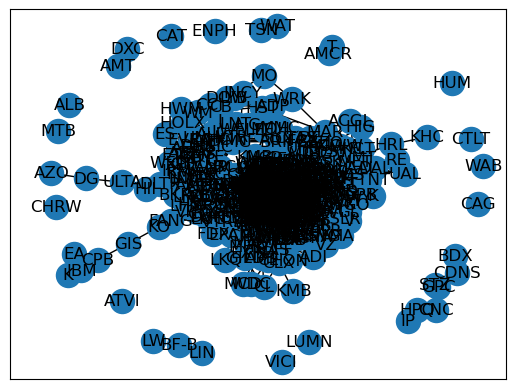

In [15]:
A=result.values
G=nx.from_numpy_matrix(A)
mapping=dict(zip(G.nodes(),result.index))

G1=nx.relabel_nodes(G,mapping)

nx.draw_networkx(G1)
nx.draw_networkx(G1,pos=nx.kamada_kawai_layout(G1))
plt.show()

In [16]:
clique=list(nx.find_cliques(G1))
#print(clique)
max_clique=max(clique,key=len)
#print()
#print("максимальная ",max_clique)

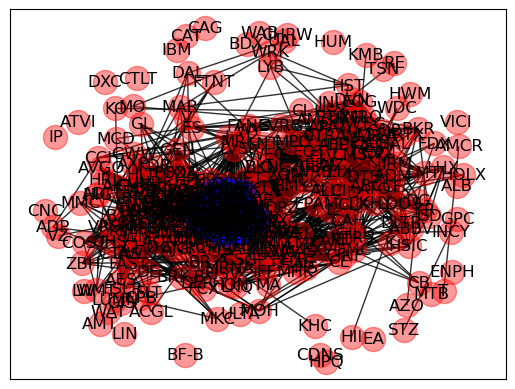

In [17]:
pos = nx.spring_layout(G1,dim=2,k=0.5)
nx.draw_networkx_nodes(G1,pos,node_color='r',alpha=0.4)
nx.draw_networkx_nodes(G1,pos,nodelist=max_clique,node_color='b',alpha=0.5)
nx.draw_networkx_edges(G1,pos,width=1.0,alpha=0.8)
nx.draw_networkx_labels(G1,pos)
plt.show()